In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:


sns.set_style("whitegrid")
# Aumentar o tamanho padrão dos gráficos
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# Célula 2: Carregamento e Inspeção Inicial de Dados

print("--- 1. Carregamento e Limpeza Inicial de Dados ---")

--- 1. Carregamento e Limpeza Inicial de Dados ---


In [6]:
try:
    df = pd.read_json('datatran_consolidado.json')
    print("\nDataFrame carregado com sucesso!")
except Exception as e:
    print(f"Erro ao carregar o arquivo: {e}")
    print("Verifique se o arquivo 'datatran_consolidado.json' está na mesma pasta do seu Notebook.")
    # Exibir apenas as primeiras linhas se o carregamento for bem-sucedido
    if 'df' in locals():
        print("\nPrimeiras 5 linhas do DataFrame:")
        display(df.head())

print("\nInformações sobre o DataFrame:")
df.info()


DataFrame carregado com sucesso!

Informações sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380851 entries, 0 to 380850
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   data_inversa            380851 non-null  object
 1   dia_semana              380851 non-null  object
 2   horario                 380851 non-null  object
 3   uf                      380851 non-null  object
 4   municipio               380851 non-null  object
 5   tipo_acidente           380850 non-null  object
 6   condicao_metereologica  380851 non-null  object
dtypes: object(7)
memory usage: 20.3+ MB


--- 2. Análise de Frequência ---


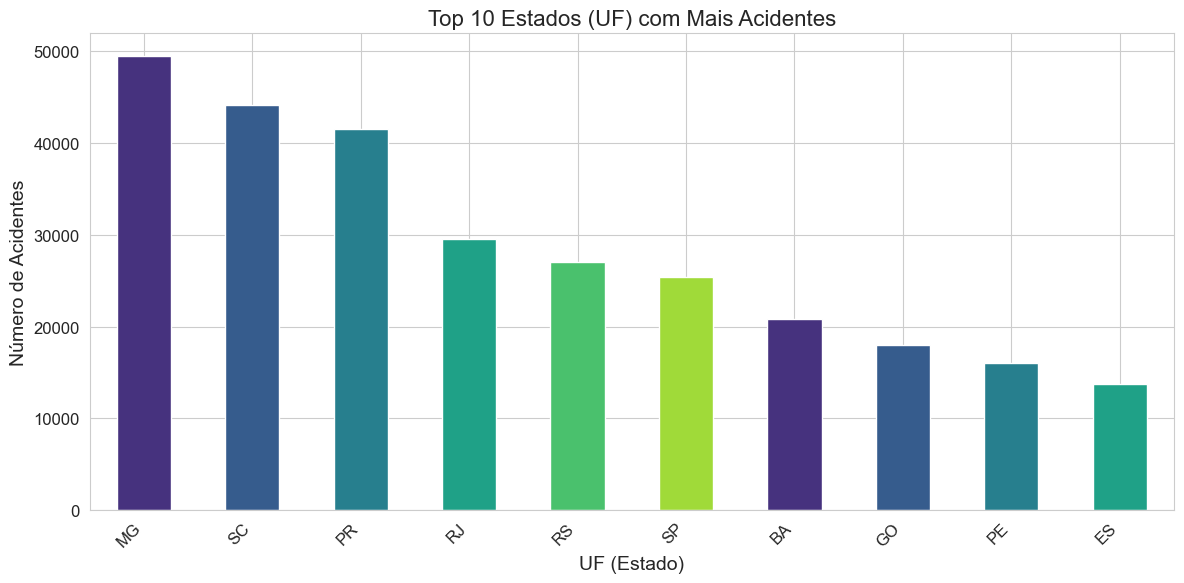

In [7]:
print("--- 2. Análise de Frequência ---")

# Gráfico 1: Acidentes por UF (Top 10)
plt.figure(figsize=(12, 6))
df['uf'].value_counts().nlargest(10).sort_values(ascending=False).plot(
    kind='bar',
    color=sns.color_palette("viridis")
)
plt.title('Top 10 Estados (UF) com Mais Acidentes', fontsize=16)
plt.xlabel('UF (Estado)', fontsize=14)
plt.ylabel('Número de Acidentes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

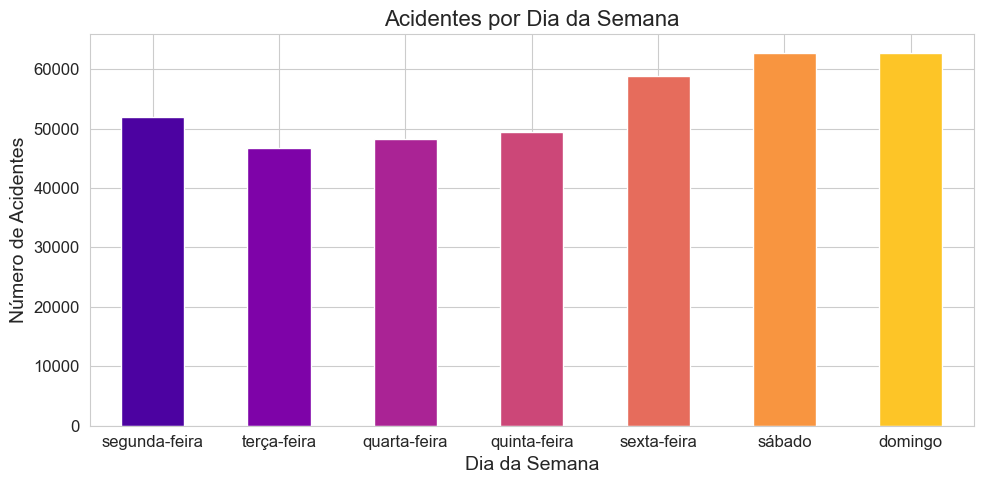

In [8]:
plt.figure(figsize=(10, 5))
ordem_dias = ['segunda-feira', 'terça-feira', 'quarta-feira', 'quinta-feira', 'sexta-feira', 'sábado', 'domingo']
df['dia_semana'].value_counts().reindex(ordem_dias, fill_value=0).plot(
    kind='bar',
    color=sns.color_palette("plasma", len(ordem_dias))
)
plt.title('Acidentes por Dia da Semana', fontsize=16)
plt.xlabel('Dia da Semana', fontsize=14)
plt.ylabel('Número de Acidentes', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


--- 3. Análise Temporal ---


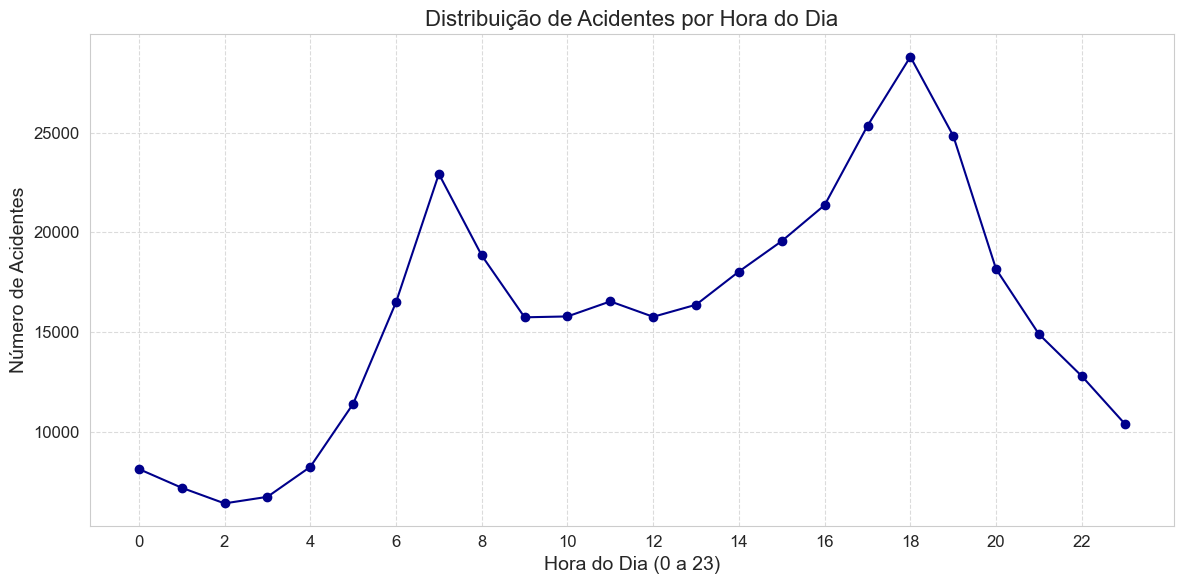


A hora de pico de acidentes é a hora 18 com 28802 ocorrências.


In [9]:
print("--- 3. Análise Temporal ---")

# Extrair a hora do campo 'horario'
df['hora'] = df['horario'].str.split(':').str[0].astype(int)

# Contar e ordenar por hora
frequencia_hora = df['hora'].value_counts().sort_index()

# Gráfico 3: Distribuição de Acidentes por Hora do Dia
plt.figure(figsize=(12, 6))
frequencia_hora.plot(
    kind='line',
    marker='o',
    color='darkblue'
)
plt.title('Distribuição de Acidentes por Hora do Dia', fontsize=16)
plt.xlabel('Hora do Dia (0 a 23)', fontsize=14)
plt.ylabel('Número de Acidentes', fontsize=14)
plt.xticks(range(0, 24, 2)) # Marcas a cada 2 horas
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(f"\nA hora de pico de acidentes é a hora {frequencia_hora.idxmax()} com {frequencia_hora.max()} ocorrências.")


In [11]:
print("--- 4. Análise de Correlação (Heatmap) ---")

# Tabela de Contingência (Frequência Cruzada) para correlação entre Condição Metereológica e Tipo de Acidente
# Normalizar os dados por linha para ver a PROPORÇÃO (probabilidade condicional)
contingency_table = pd.crosstab(
    df['condicao_metereologica'],
    df['tipo_acidente'],
    normalize='index'
) * 100

# Filtrar para os Top 5 Tipos de Acidente para manter o Heatmap legível
top_5_tipos = df['tipo_acidente'].value_counts().nlargest(5).index
contingency_table_filtered = contingency_table[top_5_tipos]

print("\nTabela de Proporção (%) - Tipo de Acidente vs. Condição Metereológica (Linhas normalizadas):")
display(contingency_table_filtered.round(2))

plt.show()

--- 4. Análise de Correlação (Heatmap) ---

Tabela de Proporção (%) - Tipo de Acidente vs. Condição Metereológica (Linhas normalizadas):


tipo_acidente,Colisao traseira,Saida de leito carrosavel,Colisao transversal,Tombamento,Colisao lateral mesmo sentido
condicao_metereologica,,,,,
Ceu Claro,19.80,13.55,13.49,8.54,8.96
Chuva,13.33,29.13,7.03,7.43,4.41
Garoa/Chuvisco,15.80,20.97,9.29,8.44,6.49
Granizo,7.69,15.38,15.38,23.08,0.00
Ignorado,15.05,17.56,9.00,10.47,5.85
Neve,0.00,37.50,12.50,0.00,12.50
Nevoeiro/Neblina,14.73,22.38,8.46,7.71,4.13
Nublado,19.01,14.46,12.61,9.16,8.49
Sol,22.59,11.61,15.63,10.02,10.38
